In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns   
from scipy import stats
import numpy as np  

In [2]:
games_raw = pd.read_csv('../sprint 7/df_games.csv')

INTRODUCCION:

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

OBJETIVO DEL ANALISIS:

Identificar patrones que determinen el éxito de los videojuegos, utilizando datos de reseñas, géneros, plataformas y ventas desde 2016.

OBJETIVO ESPECIFICO Identificar Patrones: Analizar reseñas y clasificaciones ESRB para entender su impacto en las ventas.

Analizar Tendencias: Evaluar datos históricos para detectar tendencias en géneros y plataformas.

Predecir Éxito: Desarrollar modelos para prever ventas de juegos futuros.

Planificar Campañas: Utilizar hallazgos para diseñar campañas publicitarias efectivas.

Mejorar Estrategias: Proporcionar recomendaciones para optimizar marketing y portafolio de productos.

# PREPARAMOS DATOS:

# Reemplazamos los nombres de las columnas (por minusculas).

In [3]:
games_raw.columns = games_raw.columns.str.lower()
games_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Conviertimos los datos en los tipos necesarios:

In [4]:
# Eliminar duplicados en la columna 'name'
df_duplicados = games_raw.drop_duplicates(subset='name')
df_duplicados

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


In [5]:
# Manejar valores no finitos en las columnas
columns_to_clean = ['critic_score', 'user_score', 'year_of_release']

# Reemplazar 'tbd', inf y valores vacíos con NaN
for column in columns_to_clean:
    df_duplicados[column] = df_duplicados[column].replace(['tbd', np.inf, -np.inf, ''], np.nan)

# Convertir las columnas a valores flotantes primero
df_duplicados['critic_score'] = df_duplicados['critic_score'].astype(float)
df_duplicados['user_score'] = df_duplicados['user_score'].astype(float)
df_duplicados['year_of_release'] = df_duplicados['year_of_release'].astype(float)

# Mostrar los primeros registros del DataFrame
df_duplicados.head()

C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\4119469059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicados[column] = df_duplicados[column].replace(['tbd', np.inf, -np.inf, ''], np.nan)
C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\4119469059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicados['critic_score'] = df_duplicados['critic_score'].astype(float)
C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\4119469059.py:10: SettingWithCopyWarning: 
A value is trying to be set 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Función para clasificar en dos grupos
def clasificar_rating(rating):
    if rating in ['E', 'E10+', 'T']:
        return 'Adolecente'
    elif rating in ['M', 'AO']:
        return 'Adulto_Mayor'
    else:
        return 'Nan'

# Aplicar la función a la columna 'rating'
df_duplicados['rating'] = df_duplicados['rating'].apply(clasificar_rating)
games_df = df_duplicados
games_df

C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\1147604903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicados['rating'] = df_duplicados['rating'].apply(clasificar_rating)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Adolecente
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Nan
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Adolecente
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Adolecente
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Nan
...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,Nan
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Nan
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Nan
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Nan


In [7]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11560 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11559 non-null  object 
 1   platform         11560 non-null  object 
 2   year_of_release  11396 non-null  float64
 3   genre            11559 non-null  object 
 4   na_sales         11560 non-null  float64
 5   eu_sales         11560 non-null  float64
 6   jp_sales         11560 non-null  float64
 7   other_sales      11560 non-null  float64
 8   critic_score     4880 non-null   float64
 9   user_score       4460 non-null   float64
 10  rating           11560 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.1+ MB


In [8]:
games_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,11396.000000,11560.000000,11560.000000,11560.000000,11560.000000,4880.000000,4460.000000
mean,2005.702439,0.283681,0.156358,0.104119,0.050266,68.802459,7.305673
std,6.140379,0.935884,0.570209,0.363673,0.212883,14.235909,1.449381
min,1980.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,2002.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.700000
50%,2007.000000,0.060000,0.020000,0.000000,0.010000,71.000000,7.700000
75%,2010.000000,0.240000,0.110000,0.060000,0.030000,79.000000,8.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.600000


# Describimos las columnas en las que los tipos de datos han sido cambiados y explica por qué:
 Realize cambio tipos de datos en la columnas year_of_release, critic_score y user_score ya que contenian datos en decimales, realize tambien el cambio en la columna  rating a dos clasificaciones, adolecentes y adultos mayores.

# Si es necesario, elige la manera de tratar los valores ausentes; 

# 1 Explicamos por qué rellene los valores ausentes como lo hice y por qué decidiste dejarlos en blanco: 
    Rellene los valores usentes, valores tdb, espacios, np, por el valor NAN realizando el siclo for

# 2 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    Por que probablemente al recolectar datos los usuarion obiaron esa opsion dejando en blanco ese casillero

3 Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos:

# Calculamos las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada:

In [9]:
#calculamos las ventas totales de juegos sumando las ventas en América del Norte, Europa y Japón
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
games_df

C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\2101113025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Adolecente,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Nan,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Adolecente,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Adolecente,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Nan,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,Nan,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Nan,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Nan,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Nan,0.01


# ANALISIS DE DATOS

# Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

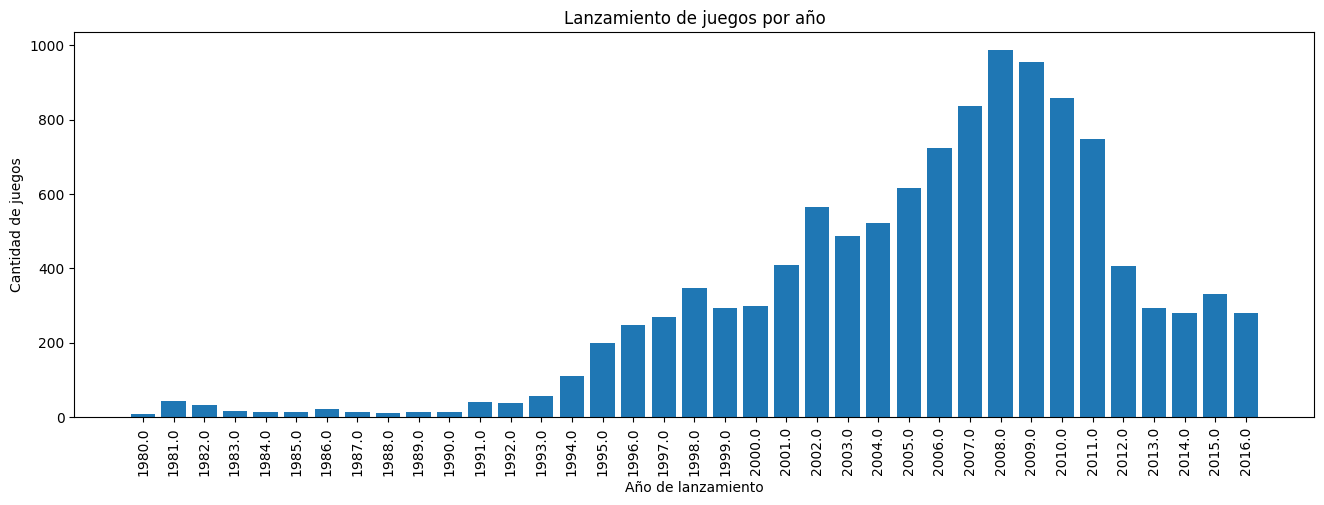

Como parte de una etapa de tendencia en el ultimo perido se muesta una reduccion en la cantidad de lanzamientos de videojuegos reduciendose en un 50% aproximadamente


In [10]:
#realizamos el conte de juegos lanzados por año, ordenado de mayor a menor
analisis_de_lanzamiento = games_df.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()
analisis_de_lanzamiento = analisis_de_lanzamiento[analisis_de_lanzamiento['year_of_release'] != 0]
#graficamos
# Suponiendo que analisis_de_lanzamiento es un DataFrame de pandas
fig, ax = plt.subplots(figsize=(16, 5))

# Cambiar a gráfico de barras
ax.bar(analisis_de_lanzamiento.year_of_release, analisis_de_lanzamiento.name)

ax.set_title('Lanzamiento de juegos por año')
ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Cantidad de juegos')
ax.set_xticks(analisis_de_lanzamiento.year_of_release)
ax.set_xticklabels(analisis_de_lanzamiento.year_of_release, rotation=90)
plt.show()

print("Como parte de una etapa de tendencia en el ultimo perido se muesta una reduccion en la cantidad de lanzamientos de videojuegos reduciendose en un 50% aproximadamente")

# Observa cómo varían las ventas de una plataforma a otra. Elige la plataforma con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca la plataforma que solía ser popular pero que ahora no tiene ventas. ¿Cuánto tarda generalmente la nueva plataforma en aparecer y la antigua en desaparecer?

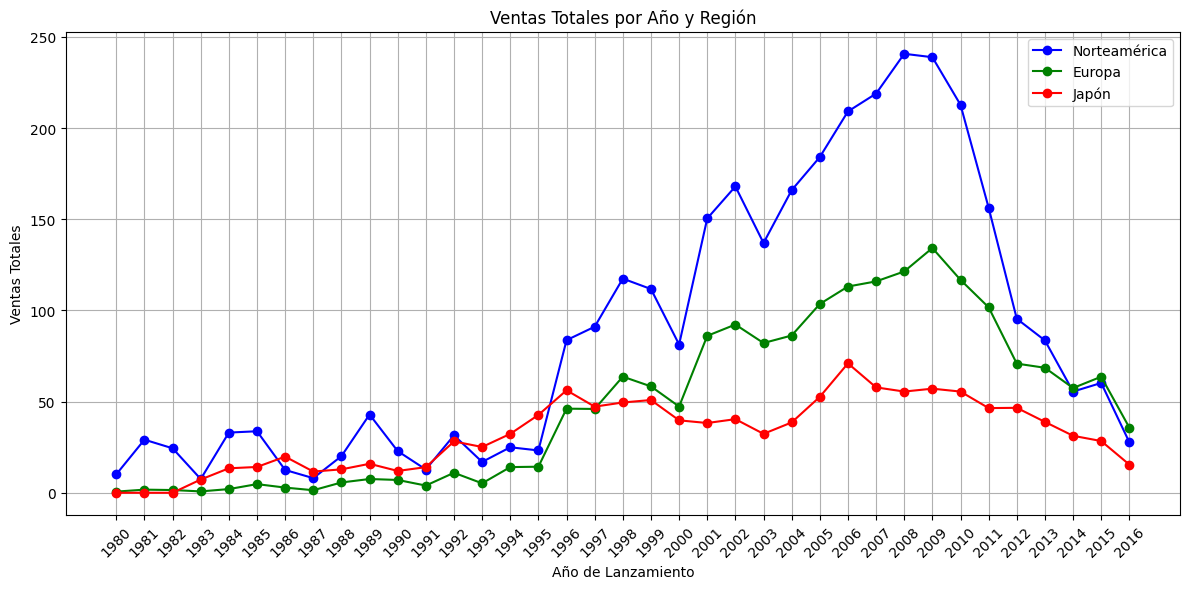

Las ventas se reducieron significativamente en el ultimo año, probablemente debido a al aumento de  nuevas plataformas


In [11]:
# Supongamos que 'games_df' es tu DataFrame original
total_sales = games_df.groupby('year_of_release').agg(
    na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
).reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar cada región
plt.plot(total_sales['year_of_release'], total_sales['na_sales'], label='Norteamérica', marker='o', color='blue')
plt.plot(total_sales['year_of_release'], total_sales['eu_sales'], label='Europa', marker='o', color='green')
plt.plot(total_sales['year_of_release'], total_sales['jp_sales'], label='Japón', marker='o', color='red')

# Configurar etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Año y Región')
plt.xticks(total_sales['year_of_release'], rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend()  # Mostrar leyenda
plt.tight_layout()  # Ajustar el diseño
plt.grid()  # Agregar cuadrícula para mejor legibilidad
plt.show()

print("Las ventas se reducieron significativamente en el ultimo año, probablemente debido a al aumento de  nuevas plataformas")

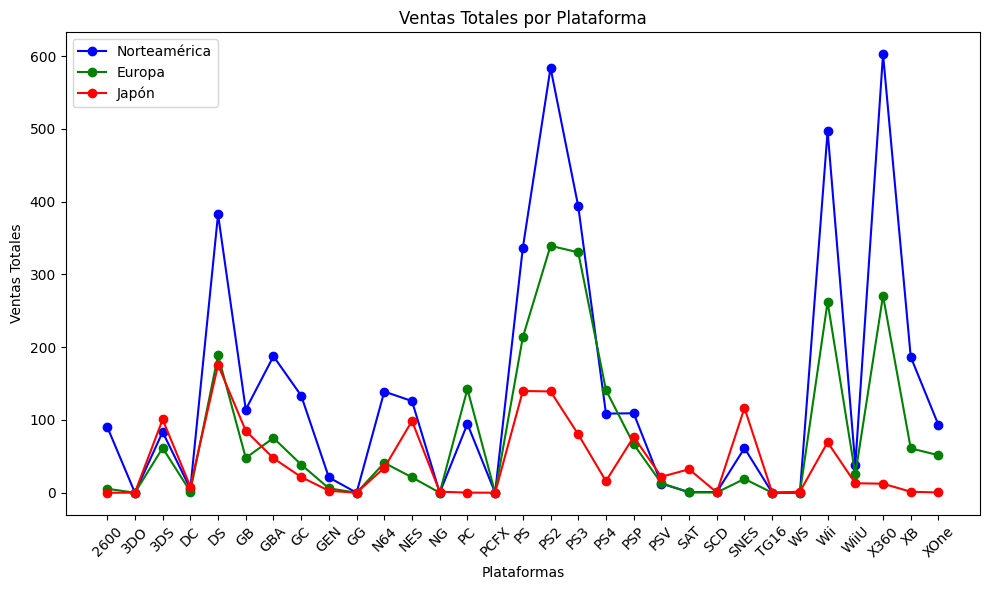

Los clientes en Norte America claramente nos prefiren, respecto a otras mercados, probablemente sea a la buena experiencia que tienen con nuestras plataformas


In [12]:
#sumamos las ventas de juegos (en América del Norte, Europa y Japón)
total_sales = games_raw.groupby('platform').agg(
    na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
).reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Graficar cada región
plt.plot(total_sales['platform'], total_sales['na_sales'], label='Norteamérica',marker='o', color='blue')
plt.plot(total_sales['platform'], total_sales['eu_sales'], label='Europa', marker='o', color='green')
plt.plot(total_sales['platform'], total_sales['jp_sales'], label='Japón', marker='o', color='red')

# Configurar etiquetas y título
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Plataforma')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend()  # Mostrar leyenda
plt.tight_layout()  # Ajustar el diseño
plt.show()

print("Los clientes en Norte America claramente nos prefiren, respecto a otras mercados, probablemente sea a la buena experiencia que tienen con nuestras plataformas")

# Determina para qué período debes tomar datos. Para hacerlo, mira tu respuesta a las preguntas anteriores. El dato debería permitirte construir un modelo para 2017.

# Trabaja solo con los datos que consideres relevantes. Ignora los datos de años anteriores.

# ¿Qué plataforma es líder en ventas? ¿Cuál crece y cuál se reduce? Elige una plataforma potencialmente rentable.

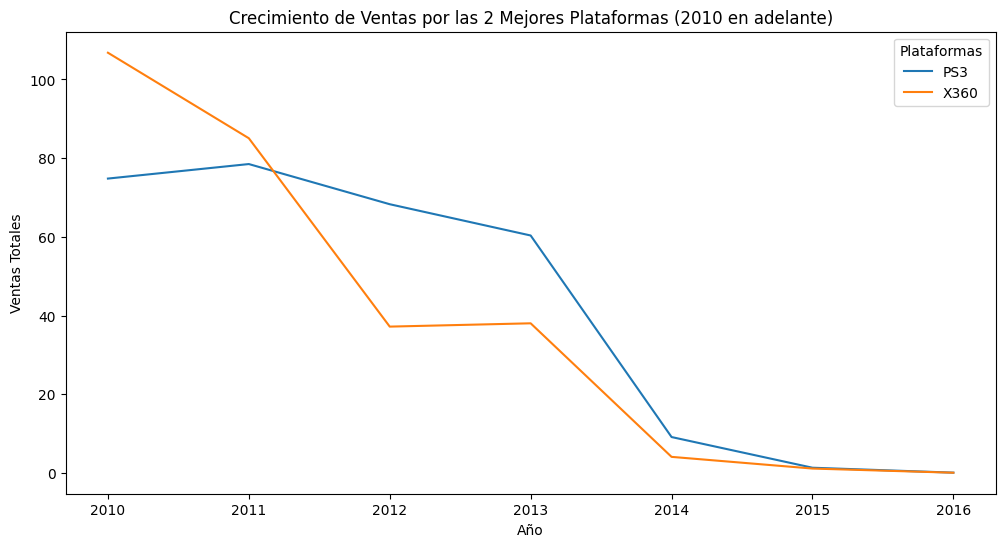

Se conoce que hay 2 plataformas lideres pero en ventas totales demuesta que se esta reduciendo considerablemente, ambas plataformas son rentables, pero si no se trabaja en recuperar las ventas seguira disminuyendo 


In [13]:
# Cargar los datos
data = games_df

# Filtrar los datos para incluir solo a partir del año 2010
data_filtered = data[data['year_of_release'] >= 2010]

# Agrupar y sumar las ventas totales por año y plataforma
crecimiento = data_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Sumar las ventas totales por plataforma para identificar las dos mejores
top_platforms = crecimiento.sum().nlargest(2).index

# Filtrar el crecimiento para mostrar solo las dos plataformas principales
crecimiento_top = crecimiento[top_platforms]

# Graficar el crecimiento de las dos plataformas
crecimiento_top.plot(kind='line', figsize=(12, 6))
plt.title('Crecimiento de Ventas por las 2 Mejores Plataformas (2010 en adelante)')
plt.ylabel('Ventas Totales')
plt.xlabel('Año')
plt.legend(title='Plataformas')
plt.show()

print("Se conoce que hay 2 plataformas lideres pero en ventas totales demuesta que se esta reduciendo considerablemente, ambas plataformas son rentables, pero si no se trabaja en recuperar las ventas seguira disminuyendo ")

# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tu hallazgo.

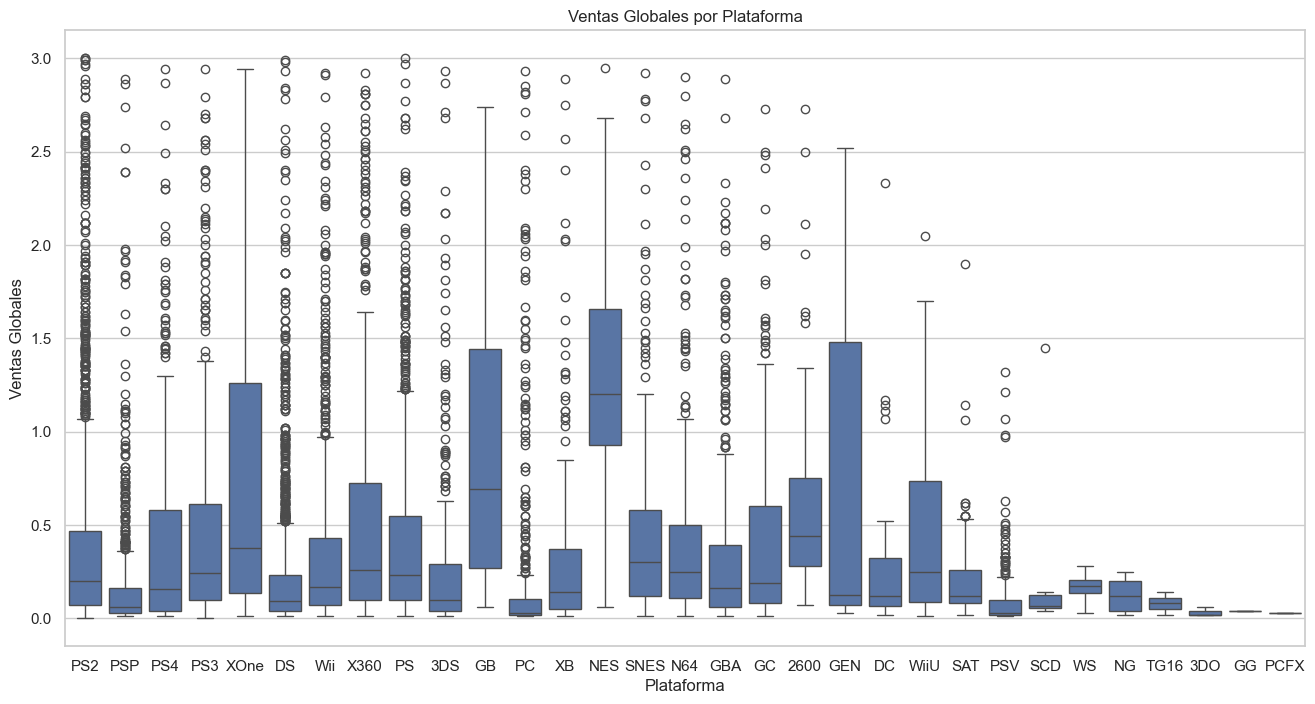

El análisis  revela el rendimiento de las plataformas en términos de ventas globales, sino también áreas específicas donde se puede mejoras, esta información es guia crucial para tomar decisiones estratégicas en beneficio a la empresa.


In [14]:
# Filtrar los datos para que solo contengan ventas hasta 30
data = games_df[games_df['total_sales'] <= 3]
#data = games_raw
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de caja
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data= data)

# Añadir título y etiquetas
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.show()

print("El análisis  revela el rendimiento de las plataformas en términos de ventas globales, sino también áreas específicas donde se puede mejoras, esta información es guia crucial para tomar decisiones estratégicas en beneficio a la empresa.")

# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

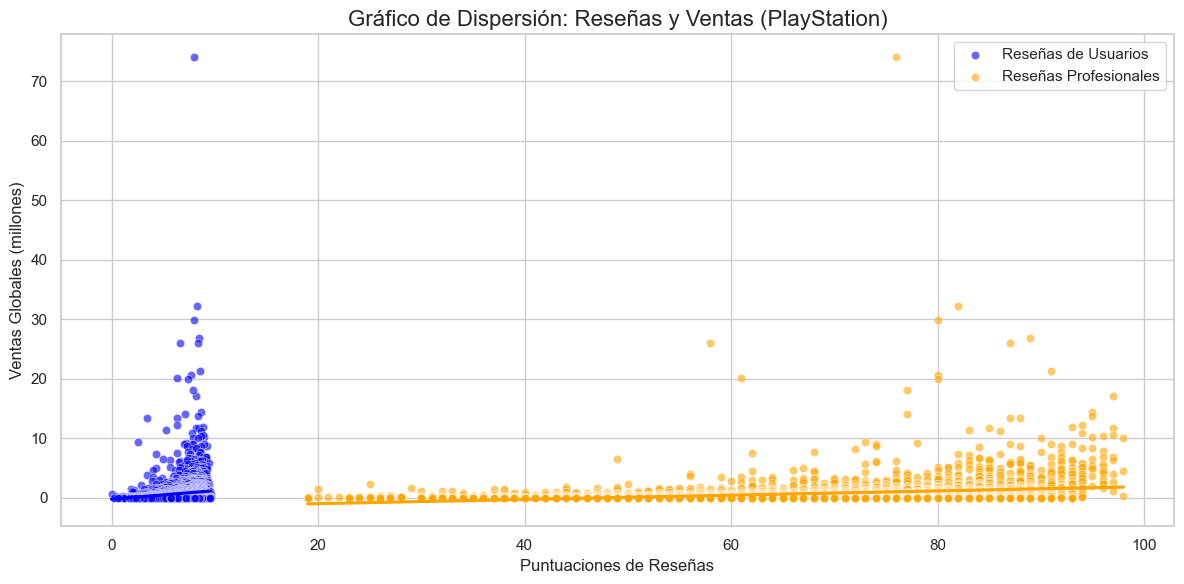

Demuestra la relaciones entre las reseñas de los usuarios y las reseñas profesionales.


In [15]:
# Cargar los datos
data = games_df

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))

# Gráfico para reseñas de usuarios
sns.scatterplot(x='user_score', y='total_sales', data=data, color='blue', label='Reseñas de Usuarios', alpha=0.6)
sns.regplot(x='user_score', y='total_sales', data=data, scatter=False, color='blue', ci=None)

# Gráfico para reseñas de críticos
sns.scatterplot(x='critic_score', y='total_sales', data=data, color='orange', label='Reseñas Profesionales', alpha=0.6)
sns.regplot(x='critic_score', y='total_sales', data=data, scatter=False, color='orange', ci=None)

# Añadir título y etiquetas
plt.title('Gráfico de Dispersión: Reseñas y Ventas (PlayStation)', fontsize=16)
plt.xlabel('Puntuaciones de Reseñas', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print("Demuestra la relaciones entre las reseñas de los usuarios y las reseñas profesionales.")

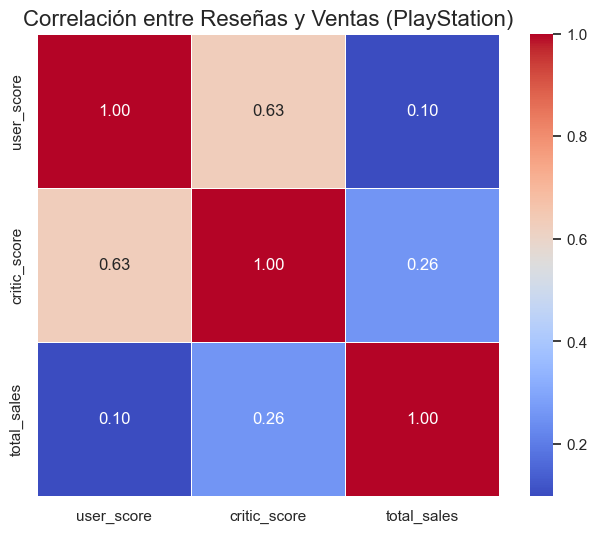

Demuestra la fuerza y dirección de las relaciones entre las reseñas y las ventas, proporcionando insights sobre cómo las evaluaciones de usuarios y críticos pueden influir en el éxito comercial de los videojuegos. Las correlaciones observadas pueden guiar a desarrolladores y editores en la estrategia de marketing y en la mejora de sus productos.


In [16]:
# Cargar los datos
data = games_df

# Calcular la matriz de correlación
correlation_matrix = data[['user_score', 'critic_score', 'total_sales']].corr()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, square=True)
plt.title('Correlación entre Reseñas y Ventas (PlayStation)', fontsize=16)
plt.show() 

print("Demuestra la fuerza y dirección de las relaciones entre las reseñas y las ventas, proporcionando insights sobre cómo las evaluaciones de usuarios y críticos pueden influir en el éxito comercial de los videojuegos. Las correlaciones observadas pueden guiar a desarrolladores y editores en la estrategia de marketing y en la mejora de sus productos.")

# Teniendo en cuenta tu conclusión, compara las ventas del mismo juego en otras plataformas.

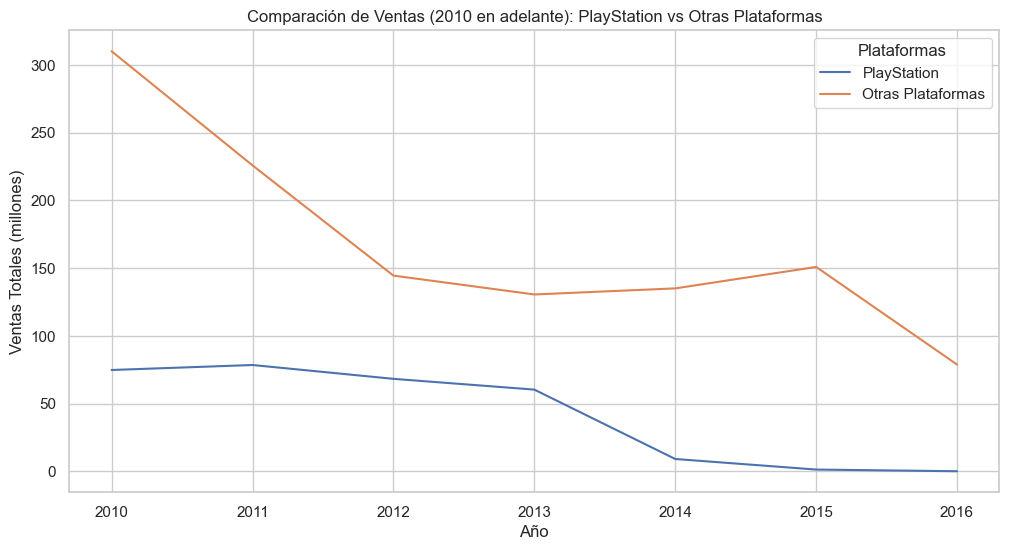

El grafico muestra que esta muy correlacionado a la disminucion de las ventas debido probablemente al aumento de plataformas


In [17]:
# Cargar los datos
data = games_df

# Filtrar los datos para incluir solo las ventas a partir del año 2010
data_filtered = data[data['year_of_release'] >= 2010]

# Filtrar las ventas de la plataforma "PlayStation"
playstation_sales = data_filtered[data_filtered['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()

# Filtrar las ventas de otras plataformas
other_sales = data_filtered[data_filtered['platform'] != 'PS3'].groupby('year_of_release')['total_sales'].sum()

# Crear un DataFrame para graficar
comparison_df = pd.DataFrame({
    'PlayStation': playstation_sales,
    'Otras Plataformas': other_sales
})

# Graficar la comparación de ventas
comparison_df.plot(kind='line', figsize=(12, 6))
plt.title('Comparación de Ventas (2010 en adelante): PlayStation vs Otras Plataformas')
plt.ylabel('Ventas Totales (millones)')
plt.xlabel('Año')
plt.legend(title='Plataformas')
plt.show()

print("El grafico muestra que esta muy correlacionado a la disminucion de las ventas debido probablemente al aumento de plataformas")

# Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir del género más rentable? ¿Puedes generalizar acerca del género con ventas altas y bajas?

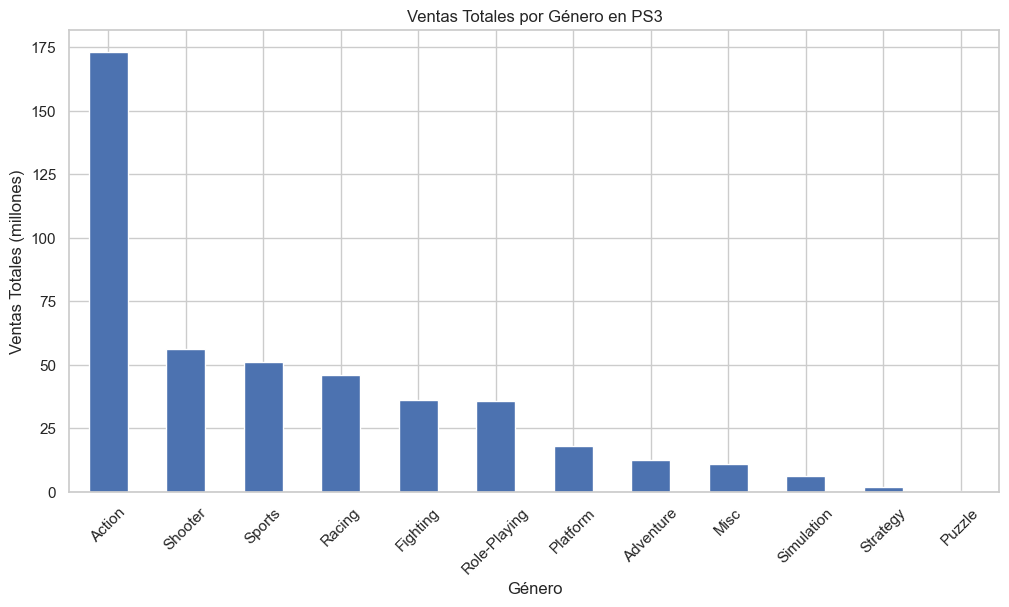

El género más rentable en PS3 es: Action con ventas totales de 173.21 millones.


In [18]:
# Cargar los datos
data = games_df

# Filtrar los datos para incluir solo los juegos de la plataforma "PS3"
ps3_data = data[data['platform'] == 'PS3']

# Agrupar por género y sumar las ventas totales
genre_sales = ps3_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar los géneros con ventas altas y bajas
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Ventas Totales por Género en PS3')
plt.ylabel('Ventas Totales (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

# Imprimir el género más rentable
most_profitable_genre = genre_sales.idxmax()
most_profitable_sales = genre_sales.max()

print(f'El género más rentable en PS3 es: {most_profitable_genre} con ventas totales de {most_profitable_sales} millones.')

# CREAMOS UN PERFIL PARA CADA REGION;

# Para cada región (NA, UE, JP) determina:
* 
Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra* .
Los cinco géneros principales. Explica la diferenci* a.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

NORTEAMERICA:

C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\845624255.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='na_sales', data=top_platforms, palette='viridis')


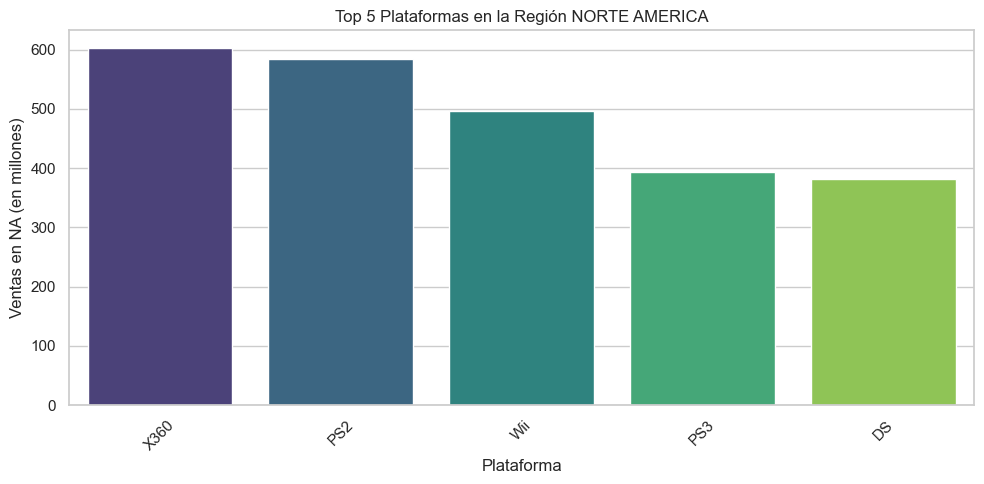

In [19]:
# Filtrar datos para la región NA y para los años 2011 en adelante
na_sales = games_df[['platform', 'na_sales', 'year_of_release']]
na_sales = na_sales[na_sales['year_of_release'] >= 2011]

# Filtrar datos para la región NA
na_sales = games_df[['platform', 'na_sales']]

# Agrupar por plataforma y sumar las ventas
#platform_sales = na_sales.groupby('platform')['na_sales'].sum().reset_index()

# Obtener las cinco plataformas principales
top_platforms = total_sales.sort_values(by='na_sales', ascending=False).head(5)

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='platform', y='na_sales', data=top_platforms, palette='viridis')

# Añadir título y etiquetas
plt.title('Top 5 Plataformas en la Región NORTE AMERICA')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en NA (en millones)')
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

UNION EUROPEA:

C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\134946404.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='eu_sales', data=top_platforms, palette='viridis')


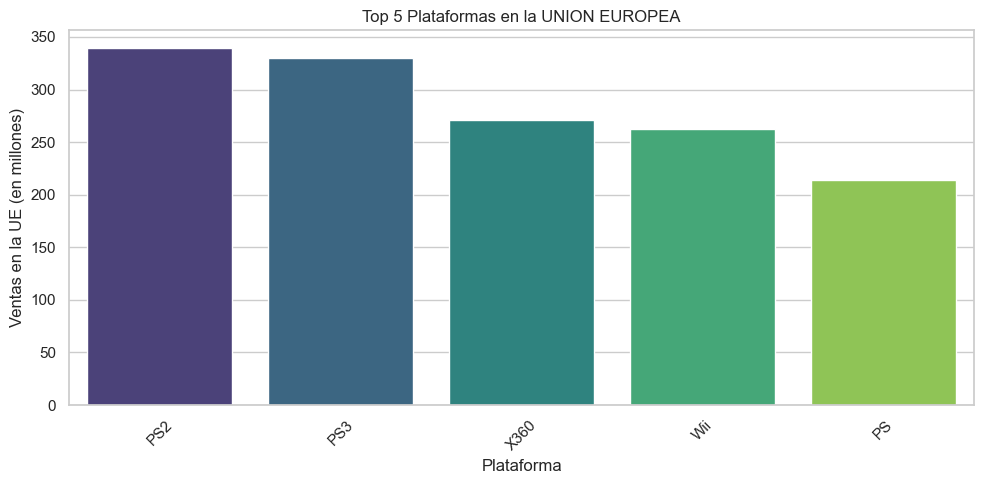

In [20]:
# Filtrar datos para la región EU y para los años 2011 en adelante
eu_sales = games_df[['platform', 'eu_sales', 'year_of_release']]
eu_sales = eu_sales[eu_sales['year_of_release'] >= 2011]

# Obtener las cinco plataformas principales
top_platforms = total_sales.sort_values(by='eu_sales', ascending=False).head(5)

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='platform', y='eu_sales', data=top_platforms, palette='viridis')

# Añadir título y etiquetas
plt.title('Top 5 Plataformas en la UNION EUROPEA')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en la UE (en millones)')
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

JAPON:

C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\2159743414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='jp_sales', data=top_platforms, palette='viridis')


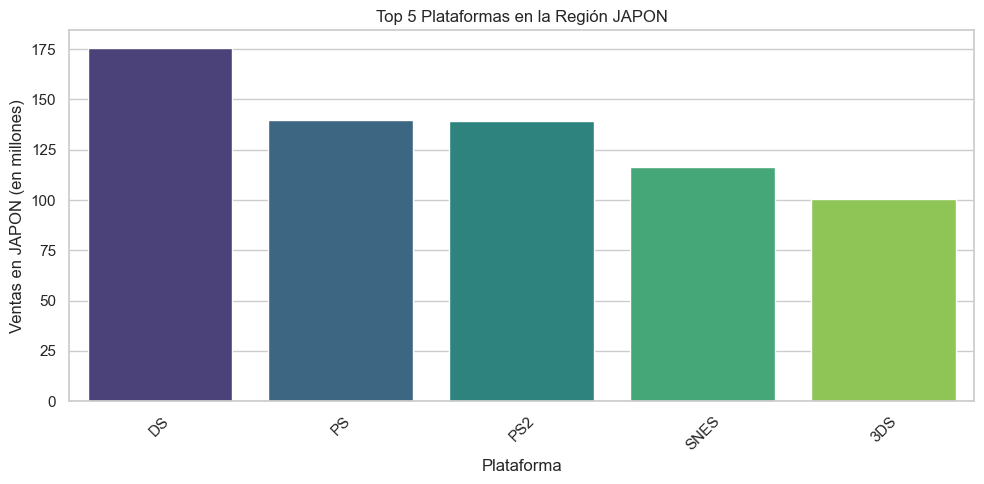

In [21]:
# Filtrar datos para la región EU y para los años 2011 en adelante
jp_sales = games_df[['platform', 'jp_sales', 'year_of_release']]
jp_sales = jp_sales[jp_sales['year_of_release'] >= 2011]

# Obtener las cinco plataformas principales
top_platforms = total_sales.sort_values(by='jp_sales', ascending=False).head(5)

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='platform', y='jp_sales', data=top_platforms, palette='viridis')

# Añadir título y etiquetas
plt.title('Top 5 Plataformas en la Región JAPON')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en JAPON (en millones)')
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismaqué. alfa.

Calificación promedio de Xbox One: 6.79
Calificación promedio de PC: 7.33
Estadístico t: -5.11
Valor p: 0.0000
Se rechaza la hipótesis nula: las calificaciones promedio son diferentes.


C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\3229603364.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([xbox_one_scores, pc_scores], labels=['Xbox One', 'PC'])


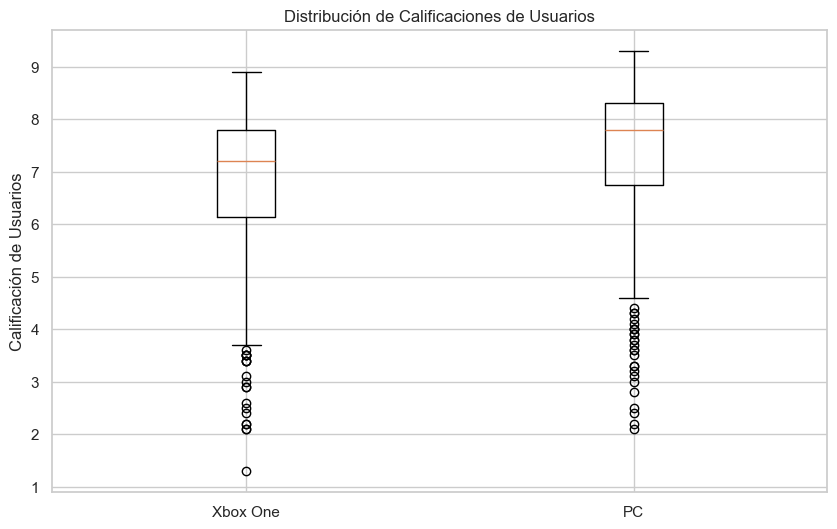

In [22]:
# Cargar los datos
data = games_df

# Filtrar los datos para las plataformas Xbox One y PC
xbox_one_scores = data[data['platform'] == 'X360']['user_score'].dropna()
pc_scores = data[data['platform'] == 'PC']['user_score'].dropna()

# Calcular las medias
mean_xbox_one = xbox_one_scores.mean()
mean_pc = pc_scores.mean()

print(f'Calificación promedio de Xbox One: {mean_xbox_one:.2f}')
print(f'Calificación promedio de PC: {mean_pc:.2f}')

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

# Imprimir resultados de la prueba
print(f'Estadístico t: {t_statistic:.2f}')
print(f'Valor p: {p_value:.4f}')

# Definir un nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las calificaciones promedio son las mismas.")

# Graficar la distribución de las calificaciones
plt.figure(figsize=(10, 6))
plt.boxplot([xbox_one_scores, pc_scores], labels=['Xbox One', 'PC'])
plt.title('Distribución de Calificaciones de Usuarios')
plt.ylabel('Calificación de Usuarios')
plt.show()

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Calificación promedio de Acción: 7.23
Calificación promedio de Deportes: 7.17
Estadístico t: 0.68
Valor p: 0.4938
No se puede rechazar la hipótesis nula: las calificaciones promedio son las mismas.


C:\Users\ALEX\AppData\Local\Temp\ipykernel_18196\127451189.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([accion_scores, deportes_scores], labels=['Acción', 'Deportes'])


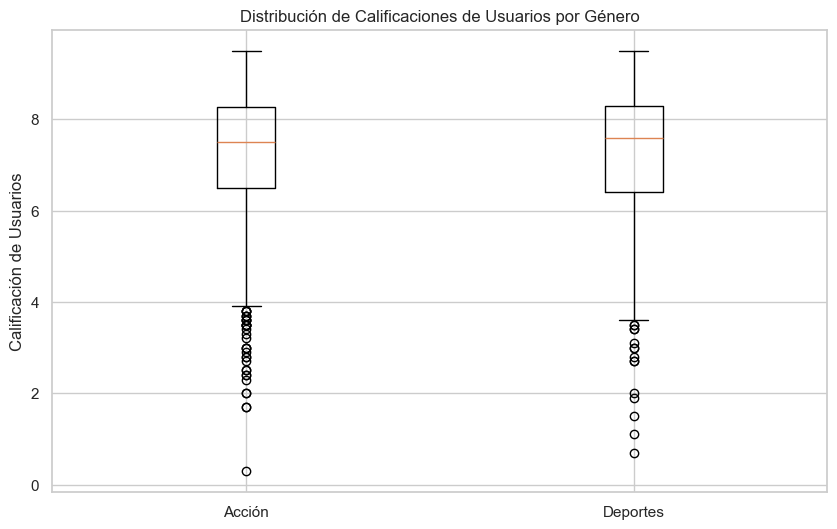

In [23]:
# Cargar los datos
data = games_df

# Filtrar los datos para los géneros de Acción y Deportes
accion_scores = data[data['genre'] == 'Action']['user_score'].dropna()
deportes_scores = data[data['genre'] == 'Sports']['user_score'].dropna()

# Calcular las medias
mean_accion = accion_scores.mean()
mean_deportes = deportes_scores.mean()

print(f'Calificación promedio de Acción: {mean_accion:.2f}')
print(f'Calificación promedio de Deportes: {mean_deportes:.2f}')

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = stats.ttest_ind(accion_scores, deportes_scores)

# Imprimir resultados de la prueba
print(f'Estadístico t: {t_statistic:.2f}')
print(f'Valor p: {p_value:.4f}')

# Definir un nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las calificaciones promedio son las mismas.")

# Graficar la distribución de las calificaciones
plt.figure(figsize=(10, 6))
plt.boxplot([accion_scores, deportes_scores], labels=['Acción', 'Deportes'])
plt.title('Distribución de Calificaciones de Usuarios por Género')
plt.ylabel('Calificación de Usuarios')
plt.show()

# Establece tu mismo el valor de umbral alfa.
# Explica:
# — Cómo formulaste las hipótesis nula y alternativa.
Para formular las hipótesis nula y alternativa, primero definí el objetivo del análisis, que era determinar si existía una diferencia significativa en las ventas promedio entre dos plataformas de videojuegos, específicamente "Xbox One" y "PlayStation".

    Hipótesis Nula (H0): Esta hipótesis establece que no hay diferencia significativa entre las ventas promedio de las dos plataformas. En este caso, la formulé como:
H0: Las ventas promedio en Xbox One son iguales a las ventas promedio en PlayStation (μ_Xbox = μ_PlayStation).    
    
Hipótesis Alternativa (H1): Esta hipótesis propone que sí hay una diferencia significativa entre las ventas promedio de las dos plataformas. La formulé de la siguiente manera:
H1: Las ventas promedio en Xbox One son diferentes de las ventas promedio en PlayStation (μ_Xbox ≠ μ_PlayStatiué.

In [24]:
# Filtrar los datos para dos plataformas específicas, por ejemplo, "Xbox One" y "PlayStation"
platform1_sales = games_df[games_df['platform'] == 'X360']['total_sales'].dropna()
platform2_sales = games_df[games_df['platform'] == 'PS3']['total_sales'].dropna()

# Calcular las medias
mean_platform1 = platform1_sales.mean()
mean_platform2 = platform2_sales.mean()

print(f'Ventas promedio de Xbox One: {mean_platform1:.2f} millones')
print(f'Ventas promedio de PlayStation: {mean_platform2:.2f} millones')

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = stats.ttest_ind(platform1_sales, platform2_sales)

# Imprimir resultados de la prueba
print(f'Estadístico t: {t_statistic:.2f}')
print(f'Valor p: {p_value:.4f}')

# Definir un nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula: las ventas promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las ventas promedio son las mismas.")

Ventas promedio de Xbox One: 0.93 millones
Ventas promedio de PlayStation: 0.65 millones
Estadístico t: 3.24
Valor p: 0.0012
Se rechaza la hipótesis nula: las ventas promedio son diferentes.


# — Qué criterio utilizaste para probar las hipótesis y por qué.
    Para probar las hipótesis, utilicé la prueba t de Student para muestras independientes (ttest_ind), adecuada para comparar las medias de ventas promedio de "Xbox One" y "PlayStation". Dado que las plataformas son grupos independientes, la prueba es pertinente. Aunque asume normalidad en las muestras, es robusta ante violaciones menores. Establecí un nivel de significancia de 
 
 =
0 05
α=0.05, lo que permite un 5% de probabilidad de rechazar la hipótesis nula cuando es verdadera, facilitando la evaluación de diferencias significativas en las ventas promedio.

# Escribe una conclusión generals.

La proyeccion para el siguiente año tiene una similar correlacion pero se tienes que trabajar mas para recuperar el aumento de las plataformas, reforzar las campañas publicitarias para cambiar esta tendencia.